<a href="https://colab.research.google.com/github/Samyak-DT/computational_physics/blob/main/Samyak_Tuladhar_08_Lab04_2D_Projectiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Expectations for All Notebooks
* Be sure to read instructions carefully and answer all questions.
* Use formatted printing and descriptive print statements
* You must include comment strings for all functions
* ALL PLOTS NEED LABELS ON X AND Y AXES
* If more than one data set is plotted, you must include a legend.
* Plot discrete data with points rather than a line.
```python
plt.plot(x, y, 'bs')
```
or
```python
plt.scatter(x,y)
```

# Lab 4: Two-Dimensional Motion with Air Resistance

*Written by Rose Finn*

*Adapted from Giordano and Nakanishi, [Computational Physics](https://www.physics.purdue.edu/~hisao/book/), Chapter 2*

# Overview

The goal of this lab is to use the **Euler method** to model system that are changing with time.  If we can describe how the system changes with time, then we can determine how the system changes by stepping it forward in time using  tiny intervals of time.  This is the basic idea behind the Euler method.

In [1]:
# import numpy and pyplot here
import numpy as np
import matplotlib.pyplot as plt

# Function Warm Up

(5 points)

Before starting the lab, we will do one problem to keep building our function-writing skills.

**The problem**: Write a function that calculates your course grade according to the following weights:

| Category | Weight |
|-----| -----|
|Homework, Activities, and Labs |35%|
| Quizzes |15%|
|Midterm Project and Exam | 20%|
|Final Project | 10%|
|Final Exam |20%|





Function requirements:
* input
  * list/array of grades
  * weights for each catagory
* return
  * course grade

Be sure to include a descriptive comment string at the beginning of your function.


In [58]:
# your function here
def grades_function(grades, weights):
  grades=np.array(grades)
  weights=np.array(weights)
  return np.sum(grades*weights)


In [59]:
# create a list of grades
grades = np.array([100,50,35,40,80])
# create the list of weights
weights=np.array([0.35,0.15,0.2,0.1,0.2])
# Feed the following array into your function
result = grades_function(grades,weights)
# print out your course grade
print(result)
# use a formatted print statement to print two decimal places
print(f"The total calculated grade should be {result:.2f}")

69.5
The total calculated grade should be 69.50


# Projectile Motion

Now let's try to apply the Euler to 2D projectile motion with air resistance.

The Euler method is a bit more complex here than with radioactive decay and the bicyle rider, because we will need to keep track of both the position and velocity versus time in both the x and y direction.

```python
x[i] = x[i-1] + vx[i-1]*dt
vx[i] = vx[i-1] + ax(input_parameters)*dt

y[i] = y[i-1] + vy[i-1]*dt
vy[i] = vy[i-1] + ay(input_parameters)*dt
```

    

In [4]:
# enter the mass, radius of cannon ball
m =  10 # what is a good value for the mass of a cannon ball
r =  0.5#radius of cannon ball

# enter acceleration
g = -9.8

# enter initial conditions
theta0_deg = 30 # degrees
v0 = 700. #m/s for a cannon ball
# convert angle to radians - numpy functions need angle in radians!
theta0 = np.radians(theta0_deg)
y0 = 100
x0 = 0

# calculate the initial x and y velocities
v0x = v0 * np.cos(theta0)
v0y = v0 * np.sin(theta0)

# enter time step dt
dt = 0.05
tmax = 1

### Air Resistance

(2 points)

Determine the coefficient of air resistance $B_2$ for the cannon ball, where
 $$B_2 = \frac{1}{2} C \rho A$$.
* C = constant.  Set this equal to 0.5
* rho is the density of air.  Set this to 1.225 kg/m$^3$ for the density of air at sea level.
* A is the cross-sectional area of the canonball - you need to figure this part out!

In [5]:
# calculate B2 here and save it as myB2
myB2 = 1/2 * 0.5 * 1.225 * (np.pi * r**2)
print(myB2)

0.24052818754046856


### Write your function to calculate the y acceleration

(5 points)

The program should have the following:
* input
  * v = speed of object
  * vy = velocity of object in the y direction
  * m = mass of object
  * B2 = coefficient of quadratic drag term.  This should be an optional argument that has a default value of zero.
* calculate the acceleration due to air resistance
  * You need to keep track of the direction of velocity and make sure the drag force is always opposite of velocity.  
  * To do so, we will use the approach shown in Giordano & Nakanashi Equation 2.19, where:
  $$ a_{drag,y} = -\frac{B_2}{m} v ~v_y.$$
  Here, $v$ is the speed or magnitude of the velocity, and $v_y$ is the velocity in the y direction.  
  
* add in the effect of gravity in the vertical direction.

* return
  * ay = acceleration in the y direction

In [14]:
# write your function to calculate the vertical acceleration
def a_y(v,vy,m,B2):
  a = g - B2/m * v * vy
  return a

### Write the function for the horizontal acceleration

(3 points)

This should be similar to the function for the vertical acceleration, except there is no gravity acting in the horizontal direction.

In [15]:
# write your function to calculate the horizontal acceleration
def a_x(v,vx,m,B2):
  a = -B2/m * v * vx
  return a


## When to stop the calculation?

(5 points)

* Our estimate of tmax is not going to work well here because of the influence of air resistance.
* Therefore, we need another way to figure out when to stop the calculation.
* Any ideas?  Write your thoughts here.

 When the vertical position (y) equals to zero.

In [26]:
# write your calculate function to compute the Euler solution for position and velocity
# NOTE: this function will initialize the x/y position and velocities as empty lists
def calculate(x,y, v_x,v_y,B2, dt):
  x_arr = [x]
  y_arr = [y]
  vx = [v_x]
  vy = [v_y]
  t = [0]
  i = 0

  while y_arr[i-1] >= 0:
    i = i + 1
    x_arr.append(x_arr[i-1] + vx[i-1]*dt)
    vx.append(vx[i-1] + a_x(np.sqrt(vx[i-1]**2 + vy[i-1]**2 ),vx[i-1],m,B2)*dt)

    y_arr.append(y_arr[i-1] + vy[i-1]*dt)
    vy.append(vy[i-1] + a_y(np.sqrt(vx[i-1]**2 + vy[i-1]**2),vy[i-1],m,B2)*dt)

    t.append(t[i-1] + dt)
  return x_arr,y_arr,vx,vy,t


### Running Your Code

(5 points)

In [27]:
# Call your function to run the calculation
x,y,vx,vy,t = calculate(x0,y0,v0x,v0y,myB2,dt)

### Plot Your Results

(5 points)

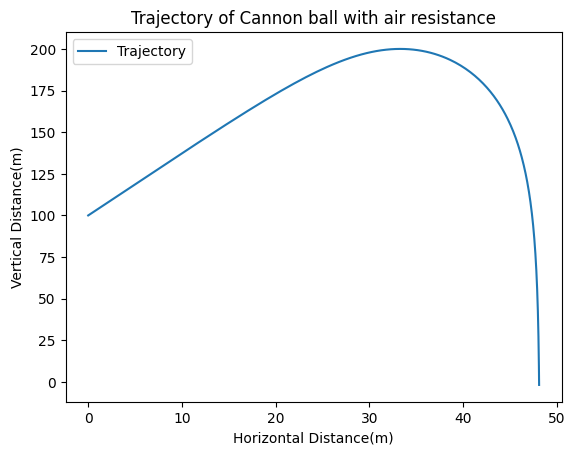

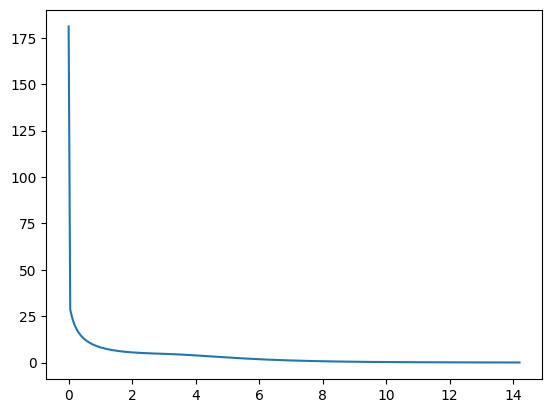

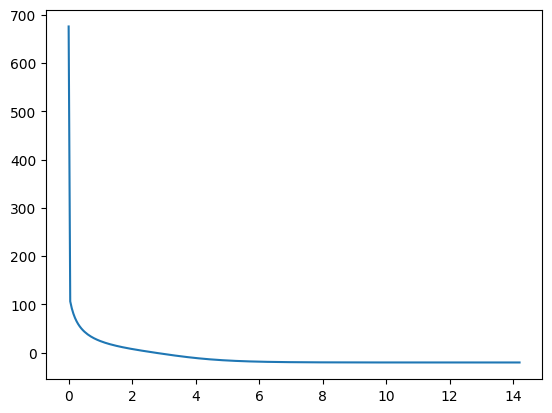

In [64]:
# plot your results
plt.title("Trajectory of Cannon ball with air resistance")
plt.plot(x,y, label = 'Trajectory')
plt.xlabel("Horizontal Distance(m)")
plt.ylabel("Vertical Distance(m)")
plt.legend()
plt.show()


# Exploring Range

(5 points)

* Make a graph of y vs x for different starting angles

* use the following values, and make a loop to run through the different values of theta
```
theta0_deg = np.arange(15,90,15)
```

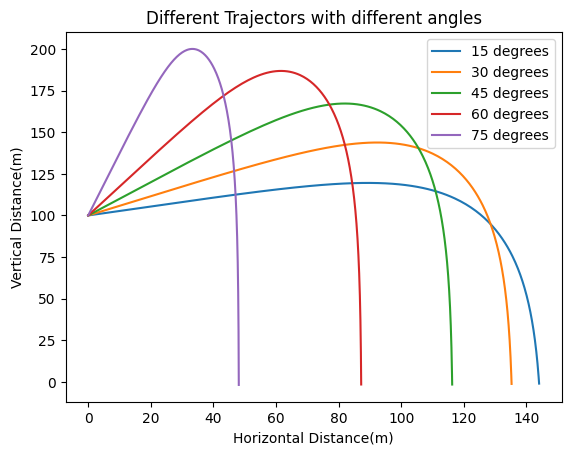

In [56]:
#code here
theta0_degs = np.arange(15,90,15)
for theta0_deg in theta0_degs:
  v0x = v0 * np.cos(np.radians(theta0_deg))
  v0y = v0 * np.sin(np.radians(theta0_deg))
  x,y,vx,vy,t = calculate(x0,y0,v0x,v0y,myB2,dt)
  plt.plot(x,y, label=f"{theta0_deg} degrees")
  plt.title("Different Trajectors with different angles")
  plt.xlabel("Horizontal Distance(m)")
  plt.ylabel("Vertical Distance(m)")
  plt.legend()

# Summary Questions

Answer these questions in the lab, and you should also mention them in your wiki summary.
* How does the range vary with the initial angle of the projectile?


* Compare the range values for with and without air resistance.